# Lab 3.1: Лінійна фільтрація зображень. Виділення границь об'єктів
### Шевченко Юлія, ФІ-31мн

In [163]:
# All the imports for the task
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Unsharp Masking (USM)

The Unsharp Masking (USM) technique is a sharpening method commonly used in image processing. It consists of the following steps:

1. **Load the image**: Begin by loading the image you will be working with.

2. **Create a blurred (unsharp) version of the original image**: Generate a blurred version of the original image, typically by applying a Gaussian blur or another smoothing filter. This blurred image serves as the reference for detecting edges and enhancing contrast.

3. **Add the unsharp image (with a certain weight) to the original**: Combine the original image with the unsharp image, applying a specified weight to control the strength of the sharpening effect.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Where:
- `original`: The original image.
- `unsharp`: The blurred version of the original image.
- `amount`: The amount or strength of the sharpening effect.

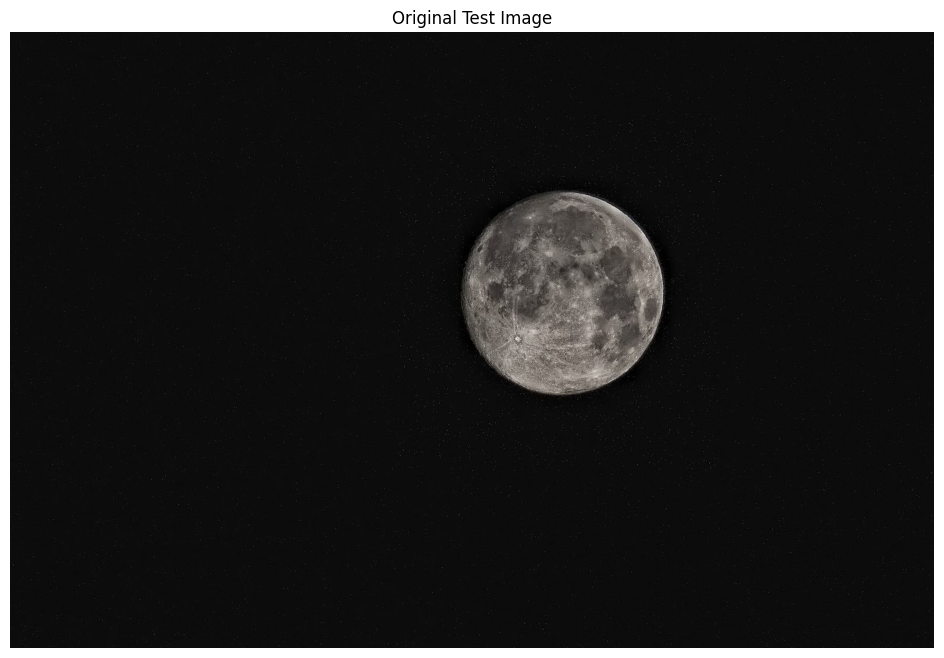

In [164]:
# Loading the test image
image_path = '../Lab_3/test_img.jpg'
test_img = cv2.imread(image_path)

# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(12, 8))
plt.imshow(test_img)
plt.title('Original Test Image')
plt.axis('off')
plt.show()

In [165]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)

# Here, we apply a Gaussian blur with a kernel size of 9x9 and sigma value of 10
blurred_img = cv2.GaussianBlur(test_img, (9, 9), 10)

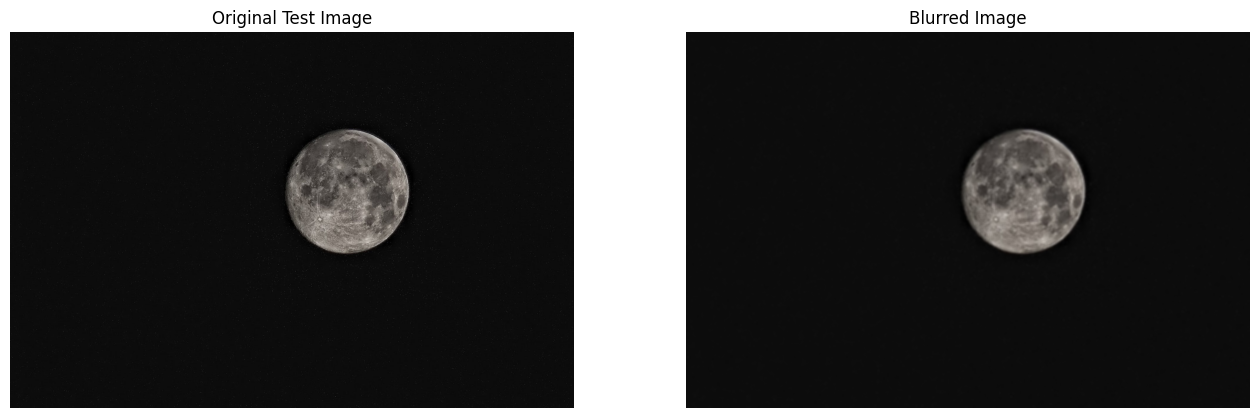

In [166]:
plt.figure(figsize=(16, 8))
    
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Original Test Image')
plt.axis('off')
    
# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(blurred_img)
plt.title('Blurred Image')
plt.axis('off')
    
plt.show()

In [167]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

difference = np.float32(test_img) - np.float32(blurred_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


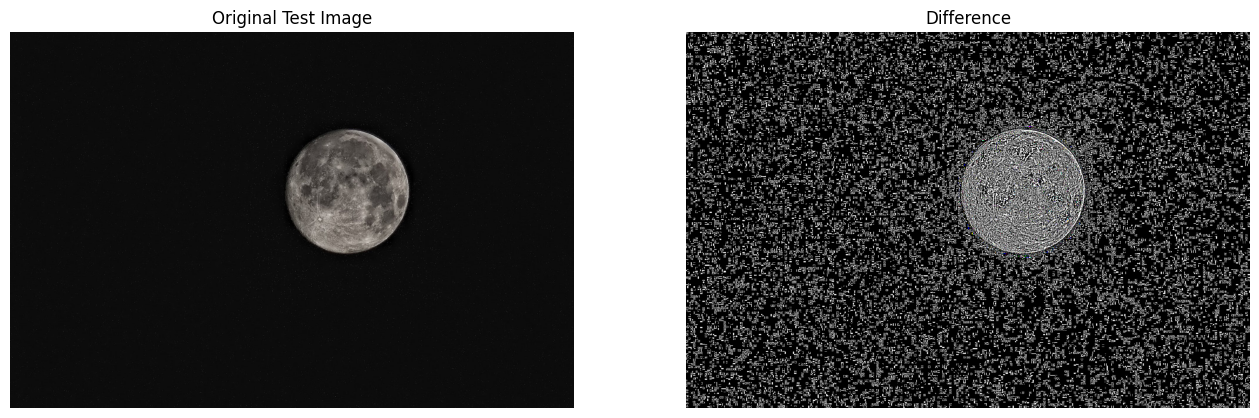

In [168]:
plt.figure(figsize=(16, 8))
    
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Original Test Image')
plt.axis('off')
    
# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(difference)
plt.title('Difference')
plt.axis('off')
    
plt.show()

In [169]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

amount = 1.5  # Adjust this value to control the strength of the sharpening effect
sharpened = np.uint8(np.clip(np.float32(test_img) + difference * amount, 0, 255))

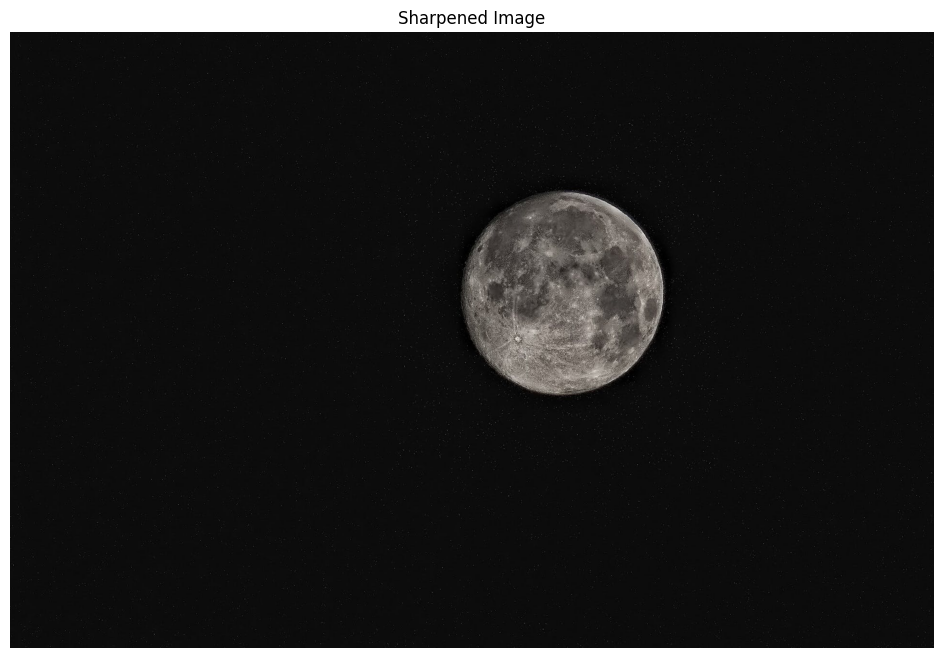

In [170]:
# Plot the sharpened image
plt.figure(figsize=(12, 8))
plt.imshow(test_img)
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

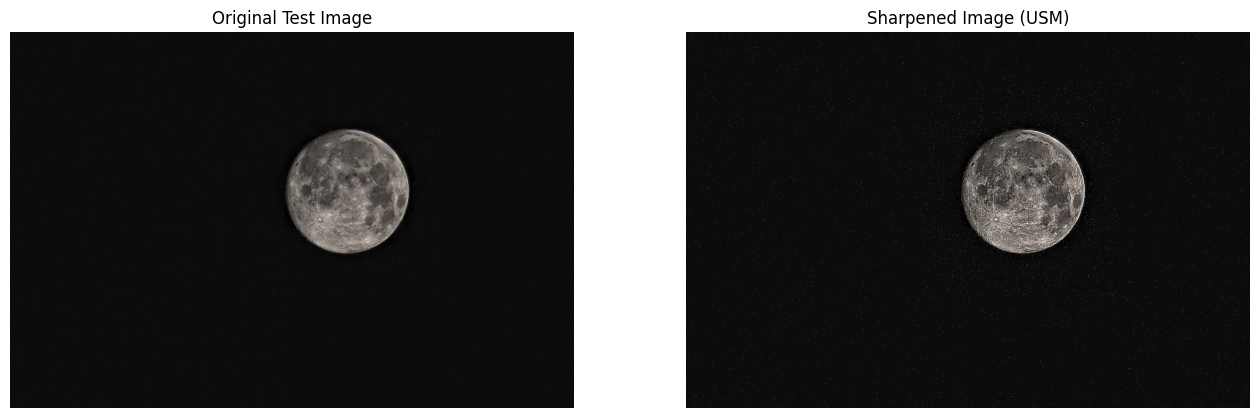

In [171]:
plt.figure(figsize=(16, 8))
    
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Original Test Image')
plt.axis('off')
    
# Processed Image
plt.subplot(1, 2, 2)
plt.imshow(sharpened)
plt.title('Sharpened Image (USM)')
plt.axis('off')
    
plt.show()

## Unsharp Masking (USM) Questions

The Unsharp Masking (USM) technique is a sharpening method commonly used in image processing. It consists of the following steps:

**What is a good (reasonable) value for the `amount` parameter?**

The `amount` parameter in the Unsharp Masking (USM) technique determines the strength of the sharpening effect applied to the image. Choosing a suitable value for this parameter involves finding a balance between enhancing image details and avoiding the introduction of artifacts. Reasonable values for `amount` typically fall within the range of 0.5 to 2.0. However, the optimal value depends on various factors, including the specific characteristics of the image and the intended application. When selecting the `amount` parameter, it's essential to consider the resolution of the image, the level of noise present, and the degree of blurriness that needs to be corrected. Lower values of `amount` produce subtle sharpening effects, suitable for images with minor blurriness, or when preserving natural appearance is crucial. Conversely, higher values of `amount` result in more pronounced sharpening, suitable for correcting significant blurriness or emphasizing fine details in the image.

**What happens if it is too small?**

If the `amount` parameter is set too small, the sharpening effect applied to the image will be minimal or barely perceptible. As a result, the image may appear similar to the original, with only subtle enhancements in sharpness. In scenarios where significant blurriness needs correction or when emphasizing image details is necessary, using a small `amount` of value may not produce the desired outcome. However, smaller `amount` values are appropriate when subtle adjustments are required to avoid introducing artifacts or unnatural-looking enhancements.

**What happens if it is too large?**

Conversely, if the `amount` parameter is set too large, the sharpening effect becomes overly aggressive, leading to several potential issues. Firstly, the sharpened image may exhibit haloing artifacts around edges, where the contrast between adjacent regions becomes exaggerated. This haloing effect can detract from the overall visual quality of the image and make it appear unnatural. Additionally, larger `amount` values can amplify noise present in the image, resulting in a grainy or speckled appearance. Moreover, excessively sharpened images may suffer from color distortion or loss of fine details, leading to a less visually pleasing result. Therefore, it's crucial to exercise caution and strike a balance between sharpening effectiveness and artifact avoidance when choosing the `amount` parameter.